<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/work/err/hourly_breadth_indicator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import duckdb
import pandas as pd

# 1. Connect to the DuckDB file
con = duckdb.connect('/content/nifty50_hourly_data.duckdb')


# 2. Get all table names from the database

tables_info = con.execute("SELECT * FROM information_schema.tables").fetchdf()
print(tables_info)


         table_catalog table_schema            table_name  table_type  \
0  nifty50_hourly_data         main  nifty50_hourly_table  BASE TABLE   

  self_referencing_column_name reference_generation user_defined_type_catalog  \
0                         None                 None                      None   

  user_defined_type_schema user_defined_type_name is_insertable_into is_typed  \
0                     None                   None                YES       NO   

  commit_action TABLE_COMMENT  
0          None          None  


In [ ]:
# 3. Run a SQL query to select data from the table
#    Replace 'your_table_name' with the actual table name in your DuckDB file
df = con.execute("SELECT * FROM nifty50_hourly_table").fetchdf()
print(df.head())

In [3]:
def calculate_percentage_above_moving_average(data,periods):
    #data = yf.download(stock_list, interval='1H' ,start=start_date)
    #data = data['Adj Close']

    # Calculate the moving average using ewm with min_periods set to 50
    ma = data.ewm(span=periods,min_periods=periods).mean()

    above_ma = data > ma
    percentage = (above_ma.sum(axis=1) / 50) * 100

    return percentage

In [7]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

In [8]:
# Calculate the percentage of stocks above their 200 DMA for each day
percentage_above_dma = calculate_percentage_above_moving_average(df,20)
result = calculate_percentage_above_moving_average(df,60)


In [11]:
nifty_index=pd.read_csv('/content/nifty_50_self_hourly_data.csv')
nifty_index['date'] = pd.to_datetime(nifty_index['date'])
nifty_index.set_index('date', inplace=True)

In [12]:
nifty_index=nifty_index.tail(200)
result=result.tail(200)
percentage_above_dma=percentage_above_dma.tail(200)

In [13]:
!pip install mplfinance --q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.0 MB/s eta 0:00:00


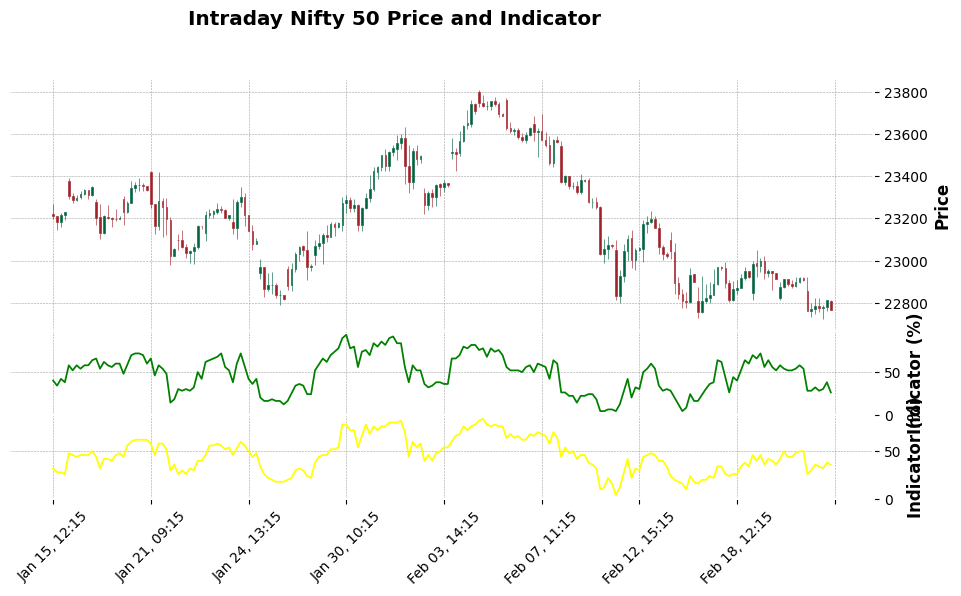

In [14]:
import mplfinance as mpf
import matplotlib.pyplot as plt

# Create an additional plot (addplot) for the indicator in a separate panel
ap_indicator = mpf.make_addplot(percentage_above_dma, panel=1, color="green", ylabel="Indicator (%)")
ap_indi_2 = mpf.make_addplot(result, panel=2, color="yellow", ylabel="Indicator (%)")

# Plot the intraday data using mplfinance:
# - Use candlestick chart for the price data
# - Add the indicator plots in separate panels
mpf.plot(
    nifty_index,
    type="candle",
    style="charles",
    title="Intraday Nifty 50 Price and Indicator",
    addplot=[ap_indicator, ap_indi_2],
    panel_ratios=(3, 1, 1),
    volume=False,
    figsize=(12, 6)
)